In [169]:
from os import chdir, getcwd
wd=getcwd()
print(wd)

C:\Users\ehdgurdkf


In [2]:
pip install xlutils

Note: you may need to restart the kernel to use updated packages.


In [170]:
import pandas as pd
import numpy as np
import os
import glob
import xlrd
import openpyxl
import xlwt
import matplotlib.pyplot as plt
import collections
from xlutils.copy import copy
from openpyxl import load_workbook

In [171]:
location = os.getcwd()
excels = glob.glob('*.xls*')

In [172]:
exl_list = []
for excel in excels:
    if excel == '통합.xlsx':
      continue
    exl_list.append(excel)

In [173]:
print(exl_list)

['1달.xlsx', '하.xls']


In [174]:
df = pd.read_excel(exl_list[0])
df

,2019-08-20 18:43:00 27.71 39.65 0.00 0.79 0.01 749.43
0,2019-08-20 18:45:00 27.70 39.66 0...
1,2019-08-20 18:50:00 27.70 39.79 0...
2,2019-08-20 18:55:00 27.75 40.36 0...
3,2019-08-20 19:00:00 27.90 42.03 0...
4,2019-08-20 19:05:00 28.04 43.60 0...
...,...
8217,2019-12-13 03:45:00 -5.26 72.49 0...
8218,2019-12-13 03:50:00 -5.30 72.51 0...
8219,2019-12-13 03:55:00 -5.41 72.71 0...
8220,2019-12-13 04:00:00 -5.45 72.82 0...


In [175]:
wb = load_workbook(exl_list[0])
sheet = wb.worksheets[0]

row_count = sheet.max_row
column_count = sheet.max_column

print(row_count) # 자료의 개수
print(column_count)

8223
1


In [176]:
wb = xlrd.open_workbook(exl_list[0])

In [177]:
sheet = wb.sheet_by_index(0)

In [178]:
wb2 = xlwt.Workbook(encoding='utf-8')
ws = wb2.add_sheet('sheet1')

In [179]:
wb2 = openpyxl.Workbook()
sheet2 = wb2.active

sheet2['A1'] = '날짜'
sheet2['B1'] = '시간'
sheet2['C1'] = '온도'
sheet2['D1'] = '상대습도'
sheet2['E1'] = '뭐였지' # 뭐였지로 표현된 부분은 그래프로 표현할 필요없는 부분입니다. 확인하기 위해 지우지는 않았습니다.
sheet2['F1'] = '뭐였지2' #
sheet2['G1'] = '뭐였지3' # 
sheet2['H1'] = '뭐였지4' #

In [180]:
i = 1
sp = {}

for j in range(1,row_count+1) :
    keyword = sheet.cell(i-1, 0).value
    
    sp['날짜']=keyword.split()[0]
    sp['시간']=keyword.split()[1]
    sp['온도']=keyword.split()[2]
    sp['상대습도']=keyword.split()[3]
    sp['뭐였지']=keyword.split()[4]
    sp['뭐였지2']=keyword.split()[5]
    sp['뭐였지3']=keyword.split()[6]
    sp['뭐였지4']=keyword.split()[7]
    
    sheet2.cell(row = i+1, column = 1).value = sp['날짜']
    sheet2.cell(row = i+1, column = 2).value = sp['시간']
    sheet2.cell(row = i+1, column = 3).value = sp['온도']
    sheet2.cell(row = i+1, column = 4).value = sp['상대습도']
    sheet2.cell(row = i+1, column = 5).value = sp['뭐였지']
    sheet2.cell(row = i+1, column = 6).value = sp['뭐였지2']
    sheet2.cell(row = i+1, column = 7).value = sp['뭐였지3']
    sheet2.cell(row = i+1, column = 8).value = sp['뭐였지4']
    i = i + 1

In [181]:
wb2.save('하.xls')

In [182]:
xc = pd.read_excel('하.xls')

In [183]:
from openpyxl.chart import LineChart, Reference

In [184]:
xc

,날짜,시간,온도,상대습도,뭐였지,뭐였지2,뭐였지3,뭐였지4
0,2019-08-20,18:43:00,27.71,39.65,0.0,0.79,0.01,749.43
1,2019-08-20,18:45:00,27.70,39.66,0.0,0.79,0.01,760.25
2,2019-08-20,18:50:00,27.70,39.79,0.0,0.79,0.01,786.38
3,2019-08-20,18:55:00,27.75,40.36,0.0,0.79,0.01,795.45
4,2019-08-20,19:00:00,27.90,42.03,0.0,0.79,0.01,785.35
...,...,...,...,...,...,...,...,...
8218,2019-12-13,03:45:00,-5.26,72.49,0.0,0.88,0.20,521.97
8219,2019-12-13,03:50:00,-5.30,72.51,0.0,0.88,0.20,527.78
8220,2019-12-13,03:55:00,-5.41,72.71,0.0,0.88,0.20,525.48
8221,2019-12-13,04:00:00,-5.45,72.82,0.0,0.88,0.20,489.08


In [185]:
table = pd.pivot_table(xc,columns=['날짜','시간'], values=['온도'])
table

    날짜          시간      
온도  2019-08-20  18:43:00    27.71
                18:45:00    27.70
                18:50:00    27.70
                18:55:00    27.75
                19:00:00    27.90
                            ...  
    2019-12-13  03:45:00    -5.26
                03:50:00    -5.30
                03:55:00    -5.41
                04:00:00    -5.45
                04:05:00    -5.49
Length: 8223, dtype: float64

In [186]:
row_max_temp = table.values
row_max_temp

array([27.71, 27.7 , 27.7 , ..., -5.41, -5.45, -5.49])

In [187]:
count = collections.Counter(row_max_temp)

a = count.most_common(10) # 가장 많이 나타나는 값을 상위 10개 출력합니다.

print("[(온도,횟수)]") # 이부분은 그래프로 표현하지 않고 엑셀상에서 Ctrl + F 로 찾기 쉽도록 온도를 바로 출력합니다.
a

[(온도,횟수)]


[(29.6, 71),
 (0.0, 69),
 (0.01, 42),
 (29.59, 19),
 (-3.09, 18),
 (26.87, 15),
 (17.41, 15),
 (-3.08, 13),
 (21.94, 12),
 (21.93, 11)]

In [188]:
for i in range(0,len(row_max_temp)) :
    if(row_max_temp[i] != 50) :
            if(i>len(row_max_temp)-72) :
                break;
            elif(row_max_temp[i]-row_max_temp[i+12] >= 15) :
                row_max_temp[i+12] = 50
            elif(row_max_temp[i]-row_max_temp[i+12] <= -15) :
                row_max_temp[i+12] = 50
row_max_temp

array([27.71, 27.7 , 27.7 , ..., -5.41, -5.45, -5.49])

In [195]:
max_temp = pd.pivot_table(xc,columns=['날짜','시간'], values=['온도'])
max_temp.values

array([27.71, 27.7 , 27.7 , ..., -5.41, -5.45, -5.49])

In [192]:
for i in range(0,len(row_max_temp)) :
    max_temp.values[i] = row_max_temp[i]

In [205]:
#table = pd.pivot_table(xc,columns=['날짜'], values=['온도'],aggfunc = 'max')
#table

table = pd.pivot_table(xc,columns=['날짜'], values=['온도'],aggfunc = 'max')
table

날짜,2019-08-20,2019-08-21,2019-11-04,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11,...,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13
온도,29.58,29.79,0.01,23.56,28.14,26.93,27.31,26.92,27.06,27.35,...,7.28,2.34,0.45,0.59,3.61,2.9,10.35,10.02,4.55,-3.94


D:\Py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Py\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Py\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


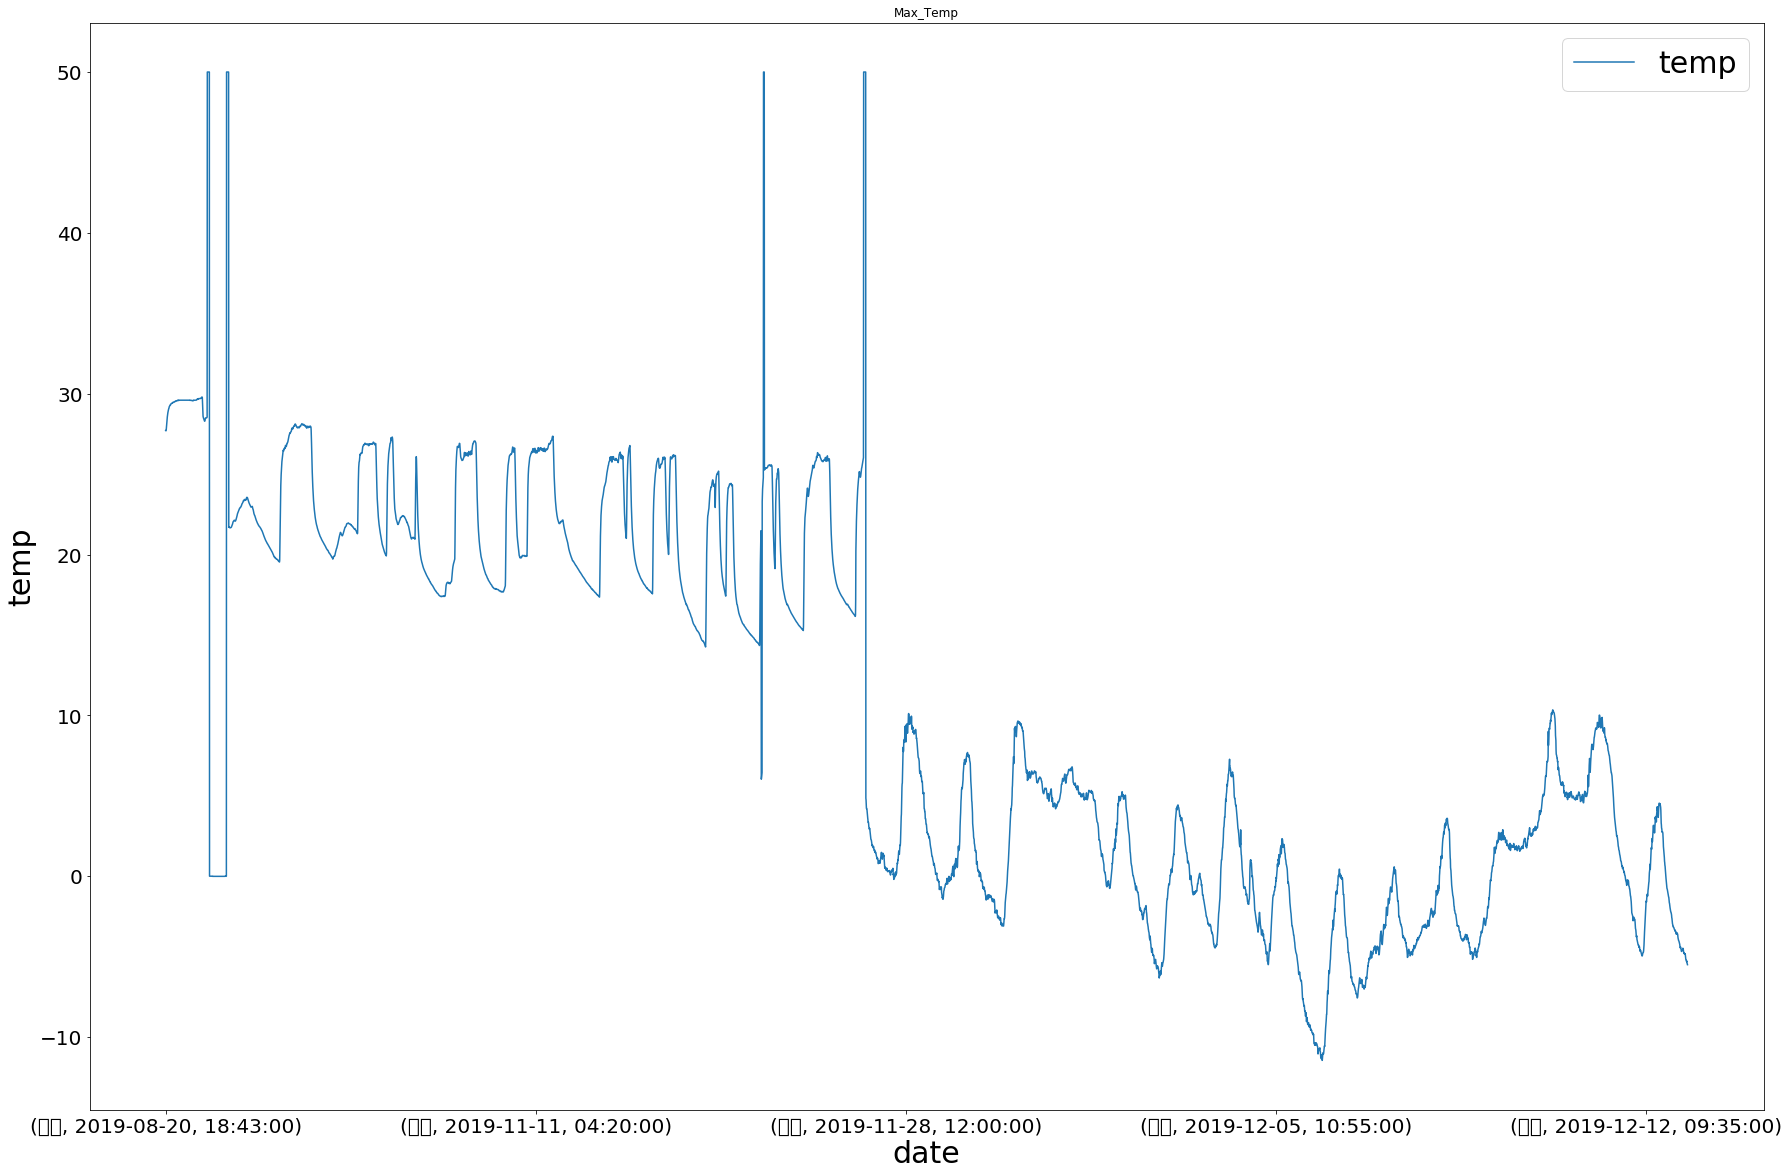

In [197]:
ax = max_temp.plot(kind='line', title='Max_Temp', figsize=(30,20), legend=True, fontsize=20)

ax.set_xlabel('date', fontsize=30)     # x축 정보 표시
ax.set_ylabel('temp', fontsize=30)     # y축 정보 표시

ax.legend(['temp'], fontsize=30)    # 범례 지정

plt.show()

# 아래 나타나는 빨간 오류화면은 문자 폰트가 깨져서 나는 오류입니다. 결과에는 지장이 없습니다.
# 50도로 찍히는 구간은 1시간 간격으로 온도가 15도 이상 변동이 있으면 찍히도록 구현했습니다.